In [1]:
from PQC import *

In [2]:
pqc = PQC("hi",4);

In [3]:
for i in range(4):
    pqc.add('rx',o=i);
for i in range(4):
    pqc.add('rz',o=i);
for i in range(3):
    pqc.add('crx',c=i,o=i+1);
pqc.add('crx',c=3,o=0);

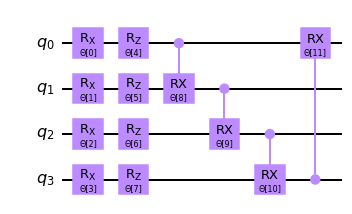

In [4]:
pqc.circ.draw('mpl')

# expressibility test

100 

200 

300 

400 



0.054299477362805465

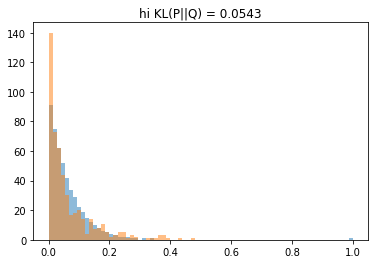

In [5]:
expressibility(pqc, 500)

# entangling capability 계산

In [6]:
entangling_capability(pqc, 1000)

100 

200 

300 

400 

500 

600 

700 

800 

900 



0.4169896770904346